### CIS 4321 Project Template

This notebook explains the steps needed to be taken to complete this project. Please carefully answer to all questions raised in this template. The notebook you submit should be self-explanatory which means that you  need to clearly explain what each peice of code is suposed to do.<br>
To create a cell that contains comments, click on the cell, then from Cell manu select CellType -> MarkDown.

### Loading and Cleaning Data

In [2]:
#Load your dataset. Use a relative path
import pandas as pd
df = pd.read_excel('pitchesfinal.xlsx', 'pitches') #reads in file
df.shape #shows shape of the file

(19999, 40)

Run descriptive statistics. Explain what you see.

Below, we find how many different pitches there are and how many we have of each.

In [3]:

df['pitch_type'].value_counts()

FF    6983
SL    3007
FT    2374
CH    2031
SI    2018
CU    1352
FC    1167
KC     447
FS     294
KN     157
IN     114
EP      14
FO       8
PO       6
Name: pitch_type, dtype: int64

These are the different variables in the data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 40 columns):
px                 19972 non-null float64
pz                 19972 non-null float64
start_speed        19972 non-null float64
end_speed          19972 non-null float64
spin_rate          19972 non-null float64
spin_dir           19972 non-null float64
break_angle        19972 non-null float64
break_length       19972 non-null float64
break_y            19972 non-null float64
ax                 19972 non-null float64
ay                 19972 non-null float64
az                 19972 non-null float64
sz_bot             19999 non-null float64
sz_top             19999 non-null float64
type_confidence    19972 non-null float64
vx0                19972 non-null float64
vy0                19972 non-null float64
vz0                19972 non-null float64
x                  19999 non-null float64
x0                 19972 non-null float64
y                  19999 non-null float64
y0       

Check for missing values.

In [5]:
df.describe()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
count,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,19972.000000,...,19999.000000,19999.000000,1.999900e+04,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,-0.065230,2.270067,87.648778,80.839756,1765.917088,182.254528,5.438935,6.564045,23.800981,-2.240407,...,310.158158,2.039552,2.015003e+09,0.862543,0.879094,0.984599,2.863793,0.281764,0.176109,0.097505
std,0.940725,0.942938,5.960116,5.310860,671.631830,66.684943,24.232239,2.967440,0.070251,10.699051,...,202.274318,2.410408,1.505423e+03,0.957209,0.821432,0.821967,1.703713,0.449870,0.380922,0.296651
min,-6.971000,-2.864000,45.200000,42.100000,14.438000,0.237000,-76.400000,0.600000,23.500000,-29.357000,...,3.000000,0.000000,2.015000e+09,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,-0.664000,1.667000,83.800000,77.700000,1300.903250,140.260500,-12.300000,4.300000,23.800000,-11.147250,...,146.000000,0.000000,2.015001e+09,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-0.053500,2.273000,89.100000,82.000000,1893.298000,196.480000,7.700000,6.000000,23.800000,-3.530000,...,294.000000,1.000000,2.015003e+09,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
75%,0.549000,2.869000,92.100000,84.800000,2263.219500,226.151500,26.300000,8.000000,23.800000,6.008000,...,454.000000,3.000000,2.015004e+09,1.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.000000
max,6.943000,7.814000,101.600000,92.800000,3649.872000,359.740000,66.300000,25.100000,24.100000,28.473000,...,1336.000000,12.000000,2.015005e+09,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,1.000000


Reveals the shape of the dataframe

In [6]:
df.head()
df.shape

(19999, 40)

Do you need to handle missin values? If yes, do it below(drop rows, drop columns, imputation)

In [7]:
tdf = df.dropna(how='any')
#dropping all rows with any null variables

In [8]:
tdf.shape

(19972, 40)

### Data Transformation

Do you need to normalize your data? 

In [9]:
X = tdf.iloc[:, 0:9] #uses the first 8 columns of the dataset, ignores the rest
from sklearn import preprocessing 
# normalize measures when you use Euclidean distance
X_scaled = preprocessing.scale(X)

Do you need to binarize some of the columns?

In [10]:
tdf['pitch_type'].value_counts()

FF    6983
SL    3007
FT    2374
CH    2031
SI    2018
CU    1352
FC    1167
KC     447
FS     294
KN     157
IN     114
EP      14
FO       8
PO       6
Name: pitch_type, dtype: int64

These are the columns representing the variables we are going to use for analysis

In [11]:
tdf.iloc[:, 0:9]

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8
5,0.627,2.397,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7
6,-1.088,1.610,93.3,85.3,2848.535,147.044,-46.3,3.6,23.7
7,-0.257,2.047,89.3,82.4,1433.743,185.948,7.3,4.8,23.8
8,1.470,2.350,92.1,85.0,2666.090,146.146,-45.0,4.0,23.8
9,-1.337,1.898,89.3,82.0,1384.143,174.388,2.0,4.9,23.8


### Modeling
Please create the requied cells based on your method of analysis. Add commnets that explain what each part of code is supposed to achieve


   ### <B>Clustering</B>
<ul><li>Run KNN (hierarchical clustering is extra 20 points) (3 points)
<li>Draw the elbow curve, find the best candidates for K (5 points)
<li>Export the clusters to Excel and interpret the clusters (5 points)
<li>Report the best model and its performance measure (2 points)
<li>Visualize your clusters using at least 3 scatter diagrams. SeaBorn library can be very useful for this purpose (5 points).



### Running KNN

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_scaled)
kmeans.labels_


array([0, 0, 0, ..., 1, 5, 4], dtype=int32)

In [13]:
kmeans.cluster_centers_

array([[ 0.1692846 ,  0.23151213,  0.45757466,  0.38698142,  0.85132304,
        -0.61271425, -1.51161785, -0.54024373, -0.51557724],
       [ 0.30278044, -0.37141818, -1.61871992, -1.62628694, -0.49010822,
        -1.80800938, -0.76807663,  1.80219504,  0.24333796],
       [-0.39468495, -0.41408938, -1.14583567, -1.14182586, -0.73317705,
         1.2800511 ,  0.35279999,  0.98986488,  0.23730452],
       [ 0.36188918, -0.28911794, -0.34309323, -0.22498164, -1.2621239 ,
        -0.54285194, -0.52667219,  0.20767391,  0.78325965],
       [ 0.42348077, -0.20744058,  0.74411739,  0.74610109,  0.61276608,
         0.50810777,  0.8778543 , -0.65509785, -0.11143228],
       [-0.82645115,  0.73103061,  0.61623998,  0.57358355,  0.37815785,
         0.52656169,  0.81591455, -0.54211226, -0.38461294]])

In [14]:
kmeans.inertia_

82681.54652888695

### Exporting data to Excel file

In [15]:

tdf["label"] = kmeans.labels_
tdf.to_excel("outputProject.xlsx")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Running a performance map

In [16]:
#create an empty dictionary
performance_map = {}
#measure performance of models with different k values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    performance_map[k] = kmeans.score(X_scaled)
print(performance_map)

{1: -179748.0, 2: -127546.34306943553, 3: -110811.32484054829, 4: -97424.64806970749, 5: -88029.27889095023, 6: -82681.54652888695, 7: -78786.65712287946, 8: -75470.45556117973, 9: -72543.2020345535}


### Scatter plots

In [17]:
import matplotlib.pyplot as plt 
# use the elbow method to determine number of clusters
plt.scatter(performance_map.keys(),performance_map.values())
plt.plot(performance_map.keys(),performance_map.values())
plt.show()

<Figure size 640x480 with 1 Axes>

In [18]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


### Speeds of pitches grouped by cluster

These are the starting speeds of pitches grouped by clusters


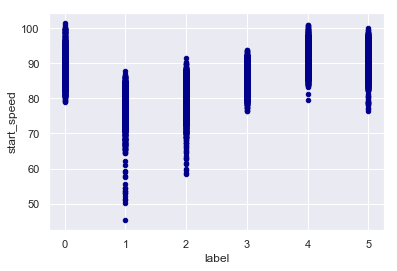

In [19]:
ax2 = tdf.plot.scatter(x='label',y='start_speed',c='DarkBlue') #the speed of the pitches compared to their categorization

### Location of pitches

Location of pitches as they cross home plate where px is the x-axis and pz is the y-axis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


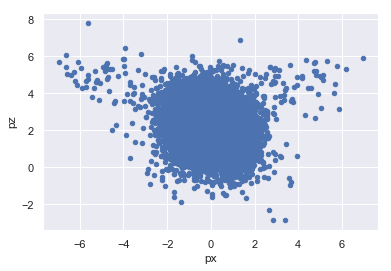

In [20]:
tdf.plot.scatter(x='px',y='pz') #location of pitches over the plate, x axis is the left and right of batter's box, while the y axis is the height of the pitch where zero is the ground.

### hierarchial clustering

This is our attempt at hierarchial clustering and it is displaying the method of how the code groups and classifies pitches

In [21]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

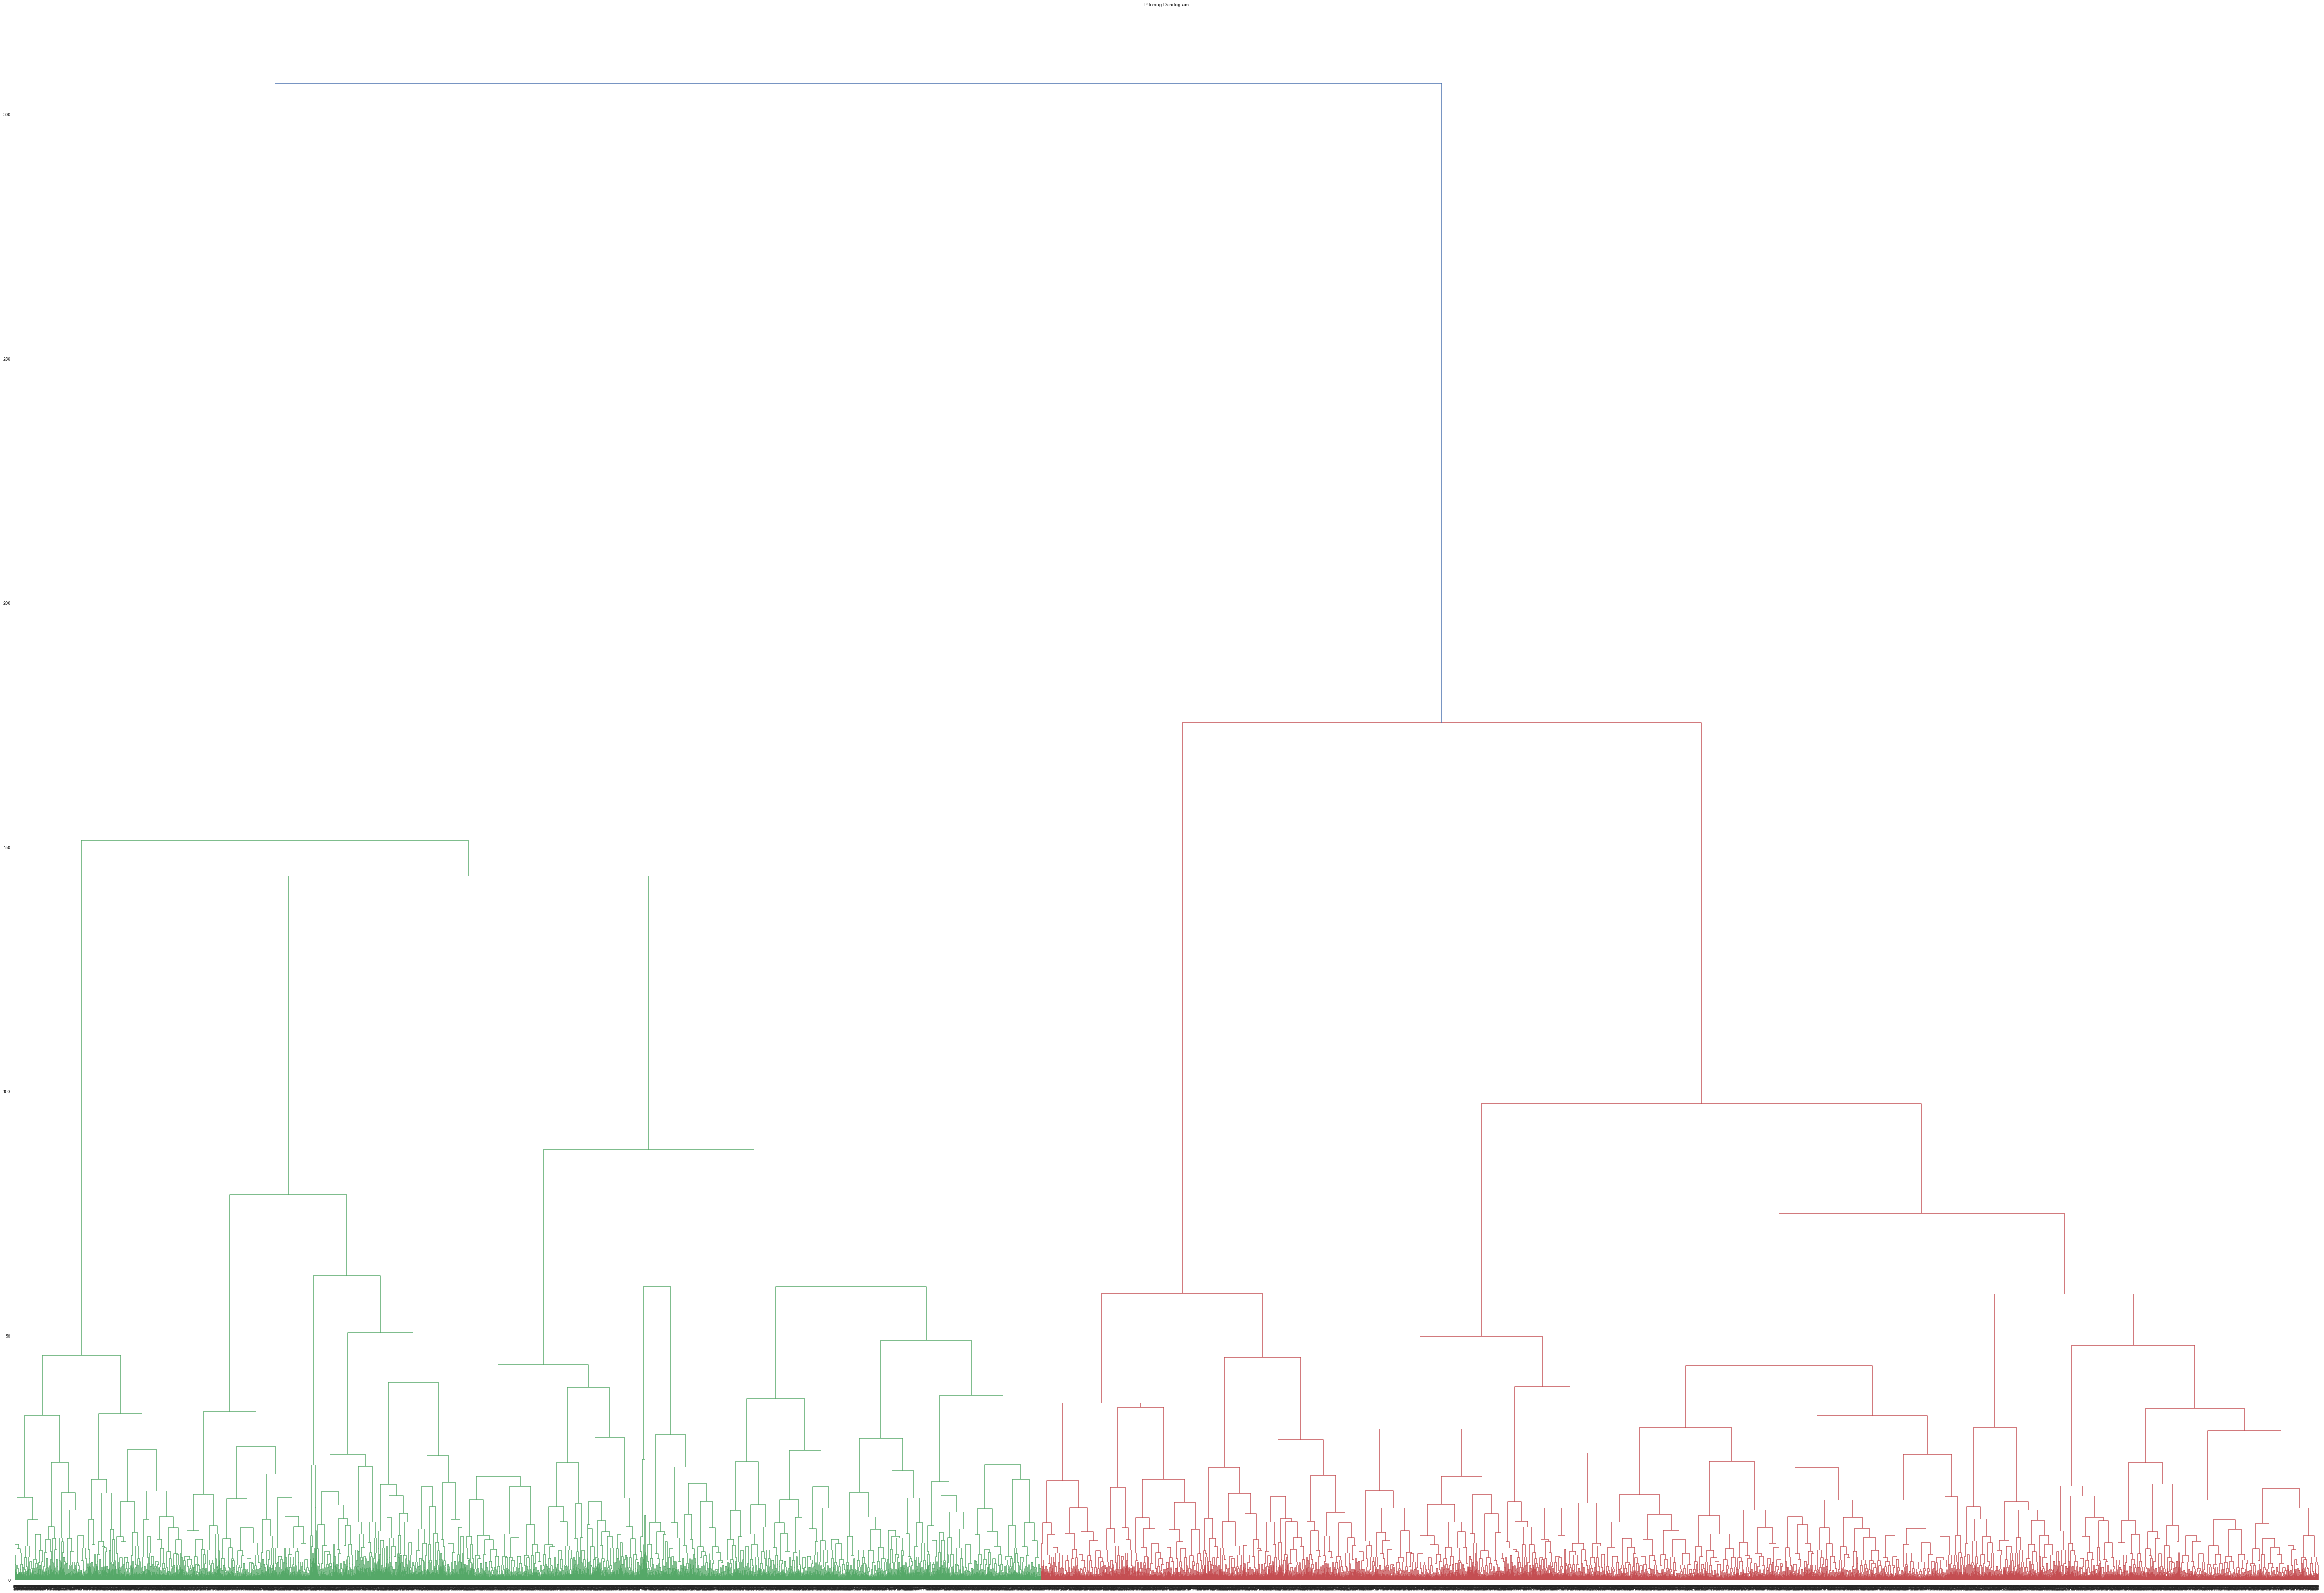

In [22]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(100, 70))  
plt.title("Pitching Dendogram")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))  

### Heatmap

This heatmap shows the correlation between the different metrics, start speed and end speed have the highest correlation with one another which is obvious. A slow pitch will be slow from the beginning to end and viceversa for fast pitches. Spin Direction and breaking angle have a very high correlation, meaning the spinning ball direction has a direct effect on what angle it will hit.

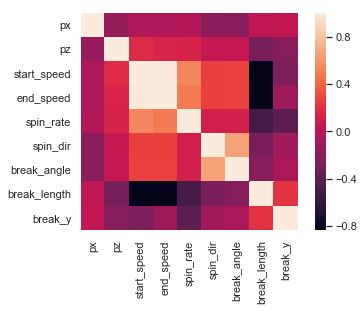

In [27]:
ph1 = tdf[['px','pz','start_speed','end_speed','spin_rate','spin_dir','break_angle','break_length','break_y']]

cor = ph1.corr()
sns.heatmap(cor, square = True)

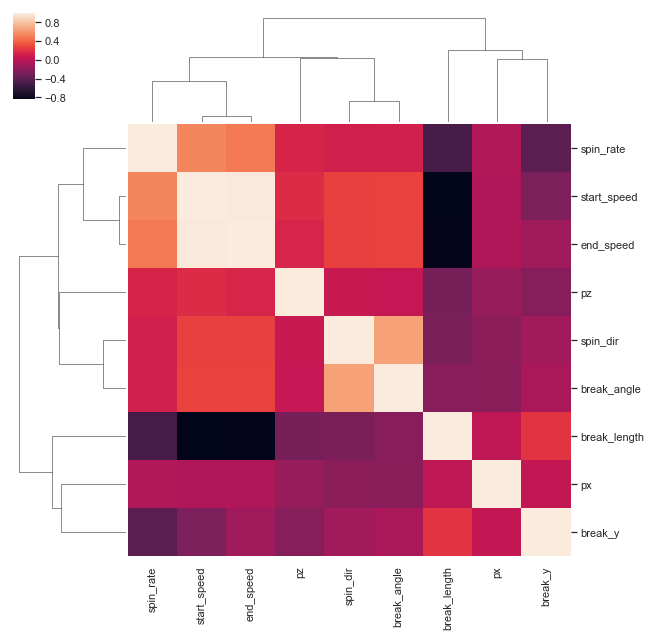

In [24]:
sns.clustermap(cor)

### Pitch Types by Cluster

Below is the types of pitch grouped by the cluster

In [25]:
tdf.groupby(["pitch_type", "label"]).size()


pitch_type  label
CH          0         238
            1         214
            2        1021
            3         228
            4         145
            5         185
CU          1         986
            2         329
            3          37
EP          1           7
            2           7
FC          0         186
            1           2
            2          19
            3         809
            4          59
            5          92
FF          0        1592
            2          16
            3         192
            4        2903
            5        2280
FO          2           2
            4           5
            5           1
FS          1           3
            2         212
            3          43
            4          23
            5          13
                     ... 
FT          1          13
            2          32
            3          57
            4         762
            5         906
IN          0           3
            1       